In [34]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from time import time

from sklearn.base import BaseEstimator,TransformerMixin
import seaborn as sns
import lightgbm as lgbm

In [ ]:
lgbm.sklearn.LGBMClassifier()

In [ ]:
def fit_transform_sklearn(transform_cat=True):
    numeric_features = ['Age', 'Fare']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_features = ['Embarked', 'Sex', 'Pclass']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='if_binary'))])
    if(transform_cat):
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)],
            )
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features)],
            )
    return preprocessor

In [47]:
data = pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), data['Survived'], test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size=0.2)

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
preprocessor = fit_transform_sklearn()
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [ ]:
# clf.named_steps["preprocessor"].transform(X_train)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_cv, y_cv))

split ticket

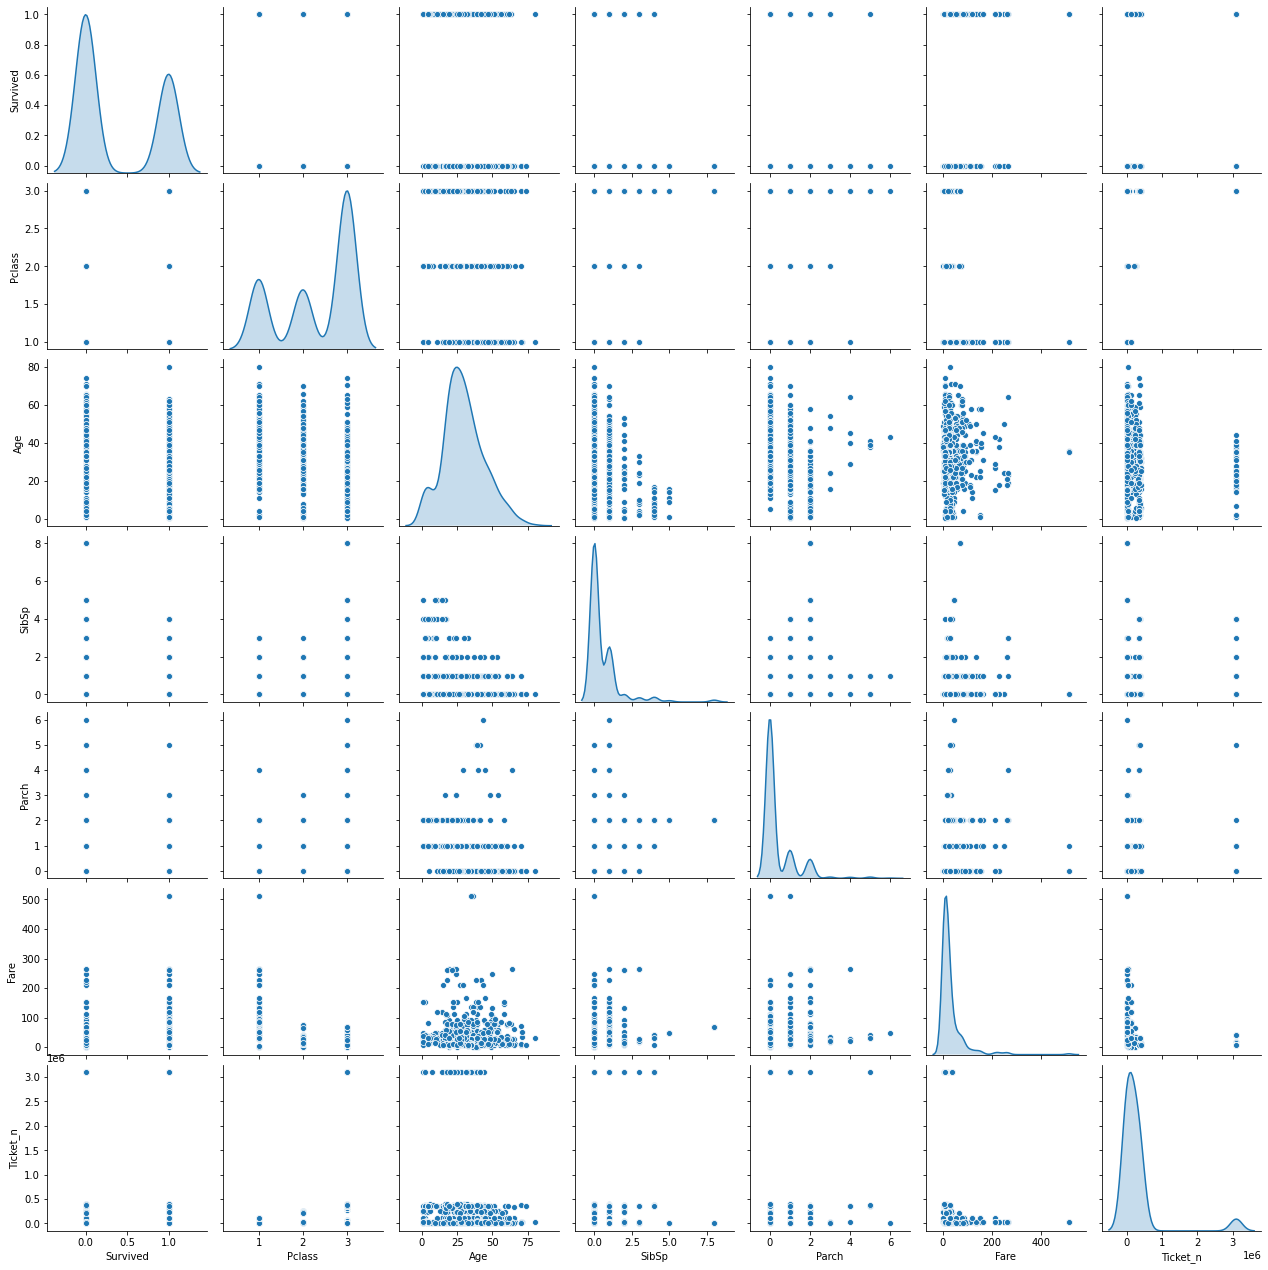

In [45]:
data = pd.read_csv('titanic.csv')
data.dtypes
def try_int(x):
    try:
        res = int(x)
        return res
    except:
        return None
data['Ticket_n'] = data['Ticket'].str.split().apply(lambda x: try_int(x[-1]))
_ = sns.pairplot(data, diag_kind='kde')

In [ ]:
class OrdinalEncoderWithUnkown(BaseEstimator,TransformerMixin):
    """
    Ordinal Encoder with option for unknown input.
    """
    def __init__(self):
        self.ord_enc = OrdinalEncoder()

    def fit_transform(self,X):
        # save unique vals of each col in case of unknown in transform stage
        # and add unknown
        self.unique = dict((c,X[c].unique()) for c in X.columns)
        unknown = pd.DataFrame(np.full((1,X.shape[1]),'Unknown'),columns=X.columns)
        # print(unknown)
        X_with_unknown = pd.concat([X,unknown],axis=0,ignore_index=True)
        print('Ord enc\n',X_with_unknown)
        # print(X_with_unknown.isna().sum())
        return self.ord_enc.fit_transform(X_with_unknown)

    def transform(self,X):
        X = X.copy()
        for c in X.columns:
            X[c] = X[c].apply(lambda x: 'Unknown' if x not in self.unique[c] else x)
        return self.ord_enc.transform(X)